In [1]:
import pandas as pd
import numpy as np

from os.path import join

from fixation_extraction import IVT
from aoi_defining import threshold_based, gradient_based
from eyetracking.visualization.static_visualization import scanpath_visualization

DATA_PATH = join('..', 'test_data')

In [2]:
def remove_points(df, x_min, x_max, y_min, y_max):
    df = df[df['norm_pos_x'] <= x_max]
    df = df[df['norm_pos_x'] >= x_min]
    df = df[df['norm_pos_y'] >= y_min]
    df = df[df['norm_pos_y'] <= y_max]
    return df

data = pd.concat([pd.read_excel(join(DATA_PATH, 'itog_gaze_1.xlsx')),
                  pd.read_excel(join(DATA_PATH, 'itog_gaze_2.xlsx'))], axis=0)

data.drop(['world_index', 'confidence', 'base_data'], axis=1, inplace=True)
data = remove_points(data, -1, 1, -1, 1)
data['gaze_timestamp'] = data['gaze_timestamp']

In [3]:
x = 'norm_pos_x'
y = 'norm_pos_y'
t = 'gaze_timestamp'

ivt = IVT(x=x, y=y, t=t, pk=['Participant', 'tekst'], threshold=0.10)

In [4]:
data_ivt = ivt.transform(data)
data_ivt

,Participant,tekst,norm_pos_x,norm_pos_y,start_time,end_time,distance_min,distance_max,duration
0,1,1,0.239144,0.516382,317242.721633,317242.721633,0.000195,0.000195,0.000000
1,1,1,0.244951,0.507583,317242.773274,317242.773274,0.000287,0.000287,0.000000
2,1,1,0.245831,0.504731,317242.785440,317242.798966,0.000179,0.000365,0.013526
3,1,1,0.246993,0.436182,317243.011151,317243.011151,0.000420,0.000420,0.000000
4,1,1,0.247093,0.436844,317243.030597,317243.030597,0.000224,0.000224,0.000000
...,...,...,...,...,...,...,...,...,...
51086,2,37,0.375928,0.620875,1834.304800,1834.304800,0.000363,0.000363,0.000000
51087,2,37,0.376400,0.620686,1834.324613,1834.324613,0.000187,0.000187,0.000000
51088,2,37,0.376263,0.617110,1834.337344,1834.337344,0.000234,0.000234,0.000000
51089,2,37,0.376046,0.616067,1834.349326,1834.349326,0.000532,0.000532,0.000000


In [5]:
window = 15
threshold = 1.5

In [6]:
data = pd.concat([pd.read_excel(join(DATA_PATH, 'itog_fix_1.xlsx')),
                  pd.read_excel(join(DATA_PATH, 'itog_fix_2.xlsx'))], axis=0)
data = remove_points(data, -1, 1, -1, 1)

In [7]:
res_grad = gradient_based(data_ivt, x, y, window, threshold=threshold, pk=['Participant', 'tekst'], gradient_eps=0)

In [8]:
res_grad.shape

(51091, 10)

In [9]:
res_grad.isna().sum()

Participant     0
tekst           0
norm_pos_x      0
norm_pos_y      0
start_time      0
end_time        0
distance_min    0
distance_max    0
duration        0
AOI             0
dtype: int64

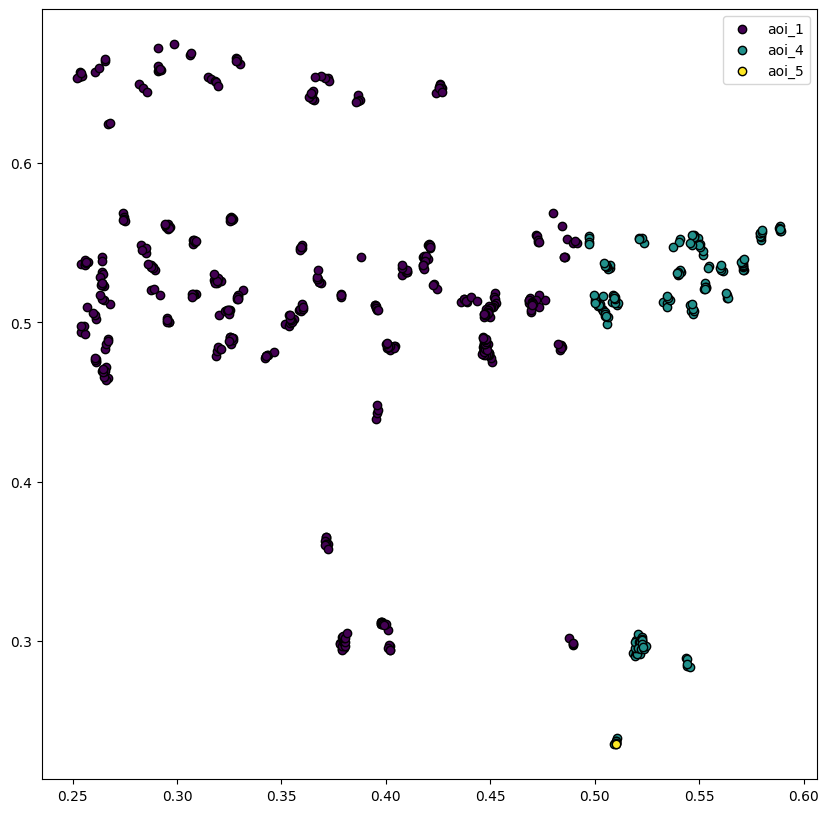

In [10]:
scanpath_visualization(res_grad[(res_grad['Participant'] == 1) & (res_grad['tekst'] == 23)], x, y, aoi='AOI', only_points=True, show_legend=True)

In [11]:
res = threshold_based(data_ivt, x, y, window, threshold, pk=['Participant', 'tekst'], inplace=False)

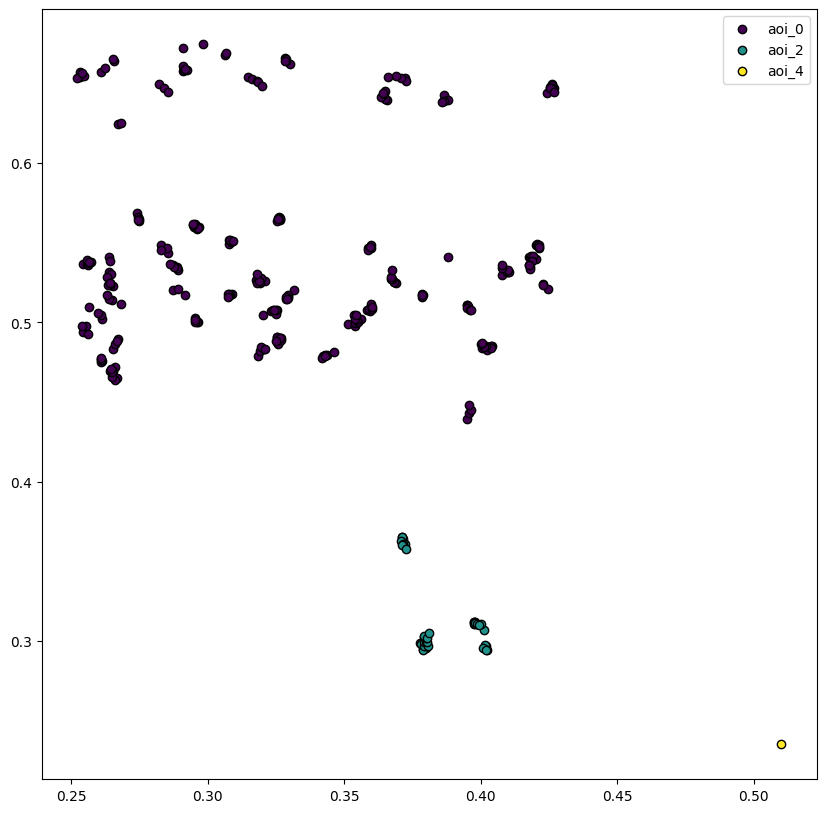

In [12]:
scanpath_visualization(res[(res['Participant'] == 1) & (res['tekst'] == 23)], x, y, aoi='AOI', only_points=True, show_legend=True)